# Step 1: Problem Satement

# Step 2: Data Gathering

In [1]:
import pandas as pd
import numpy as np 
from random import randint
from scipy import stats
import os

#for date time
import datetime
from datetime import datetime as dt

# for data visualization 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

# from pandas_profiling import ProfileReport
import seaborn as sns
import plotly.express as px
from plotly.offline import plot
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# to disable warnings
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
folder=r'C:\dec_end\ml_project\Classification\Heart_disease_prediction\Dataset'
file=r'heart.csv'
path=os.path.join(folder,file)
path

'C:\\dec_end\\ml_project\\Classification\\Heart_disease_prediction\\Dataset\\heart.csv'

In [3]:
data=pd.read_csv(path)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Step 3: EDA

### 3.1 Display top 5 rows of dataset.

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### 3.2. Display end 5 rows of dataset.

In [5]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


### 3.3 Display random 5 rows of dataset.

In [6]:
data.sample()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
511,43,1,0,120,177,0,0,120,1,2.5,1,0,3,0


### 3.4 find shape of dataset. row number and column no.

In [7]:
print(f"number of row in dataset is : {data.shape[0]}")
print(f"number of features in dataset is : {data.shape[1]}")
print(f"shape of dataset is : {data.shape}")

number of row in dataset is : 1025
number of features in dataset is : 14
shape of dataset is : (1025, 14)


### 3.5 get information about dataset like total  number of rows , total number of col, memory

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 3.6 check the Null values in dataset

In [10]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
#null and missing data dataframe percentage

null_frame=pd.DataFrame(index=data.columns.values)
null_frame['Null Frequency']=data.isnull().sum().values
percent=data.isnull().sum().values/data.shape[0]
null_frame['Missing %age']=np.round(percent, decimals=4)*100
null_frame.transpose()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
Null Frequency,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Missing %age,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3.7 get overall statistics about the dataset.

In [12]:
data.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 3.8 Distribution of data

In [13]:
data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

### 3.9 Checking Balance or Imbalance dataset

<AxesSubplot:xlabel='target', ylabel='count'>

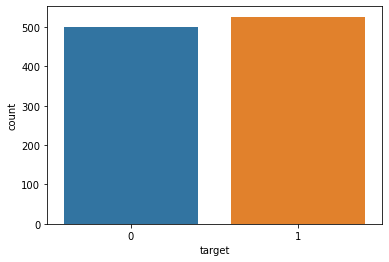

In [14]:
data['target'].value_counts()
sns.countplot(data['target'])

### 3.10 Checking duplicate and remove duplicate datapoints.

In [15]:
duplicate=data[data.duplicated()]
duplicate

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [16]:
data_copy=data.copy(deep=True)
data_copy

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [17]:
print('conatins redudant records ',data_copy.duplicated().any())
print('duplicated count',data_copy.duplicated().sum())
print('data shape',data_copy.shape)

conatins redudant records  True
duplicated count 723
data shape (1025, 14)


### 3.11 univariate analysis

In [18]:
cat_cols=data.select_dtypes(include=['object']).columns
cat_cols

Index([], dtype='object')

value count of feature age in dataset is : 
58    68
57    57
54    53
59    46
52    43
51    39
56    39
62    37
60    37
44    36
64    34
41    32
63    32
67    31
61    31
55    30
65    27
43    26
42    26
53    26
66    25
45    25
48    23
46    23
50    21
47    18
49    17
35    15
39    14
70    14
68    12
38    12
71    11
40    11
69     9
37     6
34     6
29     4
76     3
77     3
74     3
Name: age, dtype: int64
****
*****


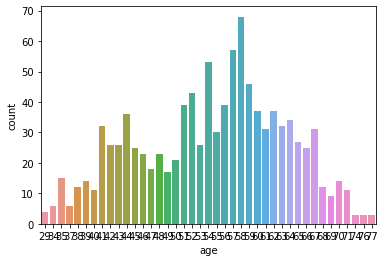

value count of feature sex in dataset is : 
1    713
0    312
Name: sex, dtype: int64
****
*****


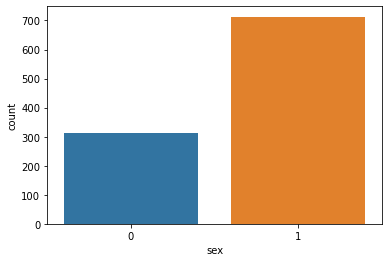

value count of feature cp in dataset is : 
0    497
2    284
1    167
3     77
Name: cp, dtype: int64
****
*****


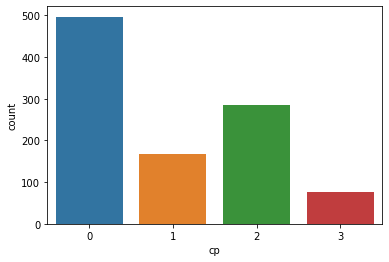

value count of feature trestbps in dataset is : 
120    128
130    123
140    107
110     64
150     55
138     45
128     39
125     38
160     36
112     30
132     28
118     24
108     21
124     20
135     20
145     17
134     17
152     17
170     15
122     14
100     14
136     11
126     10
180     10
142      9
115      9
105      9
146      8
148      7
178      7
94       7
144      6
102      6
154      4
117      4
165      4
200      4
114      4
123      4
192      3
106      3
104      3
129      3
174      3
155      3
172      3
164      3
156      3
101      3
Name: trestbps, dtype: int64
****
*****


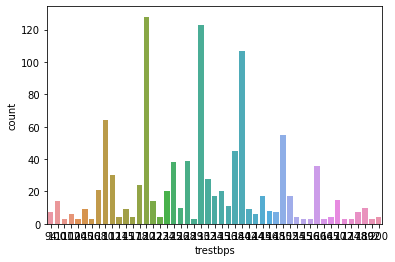

value count of feature chol in dataset is : 
204    21
234    21
197    19
212    18
254    17
       ..
164     3
394     3
215     3
160     3
141     3
Name: chol, Length: 152, dtype: int64
****
*****


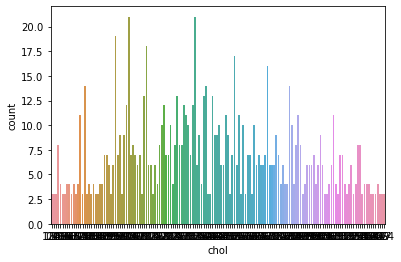

value count of feature fbs in dataset is : 
0    872
1    153
Name: fbs, dtype: int64
****
*****


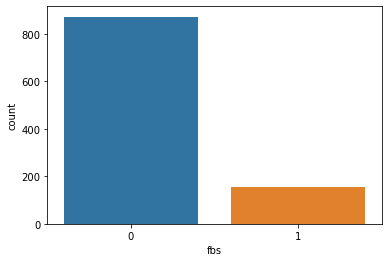

value count of feature restecg in dataset is : 
1    513
0    497
2     15
Name: restecg, dtype: int64
****
*****


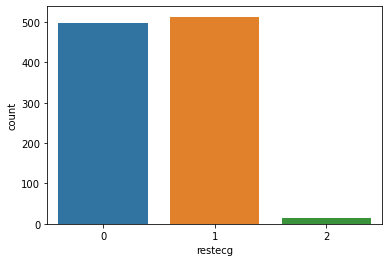

value count of feature thalach in dataset is : 
162    35
160    31
163    29
173    28
152    28
       ..
194     3
185     3
106     3
88      3
113     3
Name: thalach, Length: 91, dtype: int64
****
*****


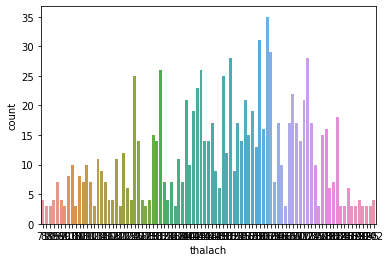

value count of feature exang in dataset is : 
0    680
1    345
Name: exang, dtype: int64
****
*****


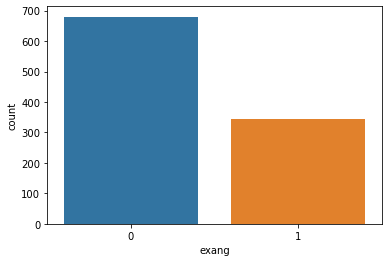

value count of feature oldpeak in dataset is : 
0.0    329
1.2     58
1.0     51
0.6     47
0.8     44
1.4     44
1.6     37
0.2     37
1.8     36
2.0     32
0.4     30
0.1     23
2.8     22
2.6     21
3.0     17
1.9     16
1.5     16
3.6     15
0.5     15
2.2     14
4.0     12
2.4     11
0.3     10
3.4     10
0.9     10
3.2      8
2.5      7
2.3      7
4.2      6
1.1      6
4.4      4
3.8      4
5.6      4
3.1      4
1.3      3
2.9      3
2.1      3
6.2      3
0.7      3
3.5      3
Name: oldpeak, dtype: int64
****
*****


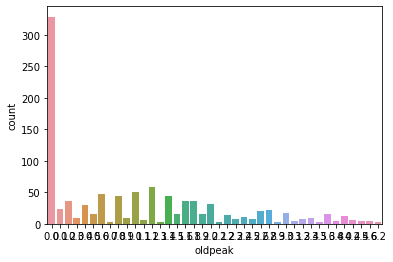

value count of feature slope in dataset is : 
1    482
2    469
0     74
Name: slope, dtype: int64
****
*****


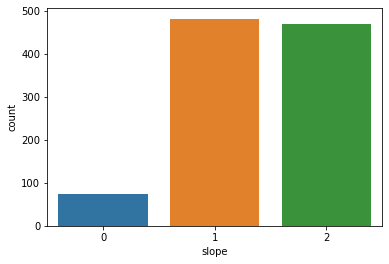

value count of feature ca in dataset is : 
0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64
****
*****


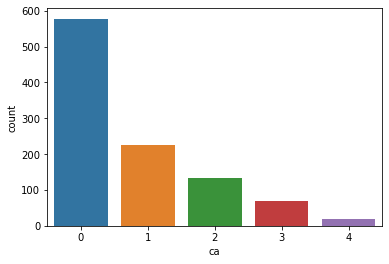

value count of feature thal in dataset is : 
2    544
3    410
1     64
0      7
Name: thal, dtype: int64
****
*****


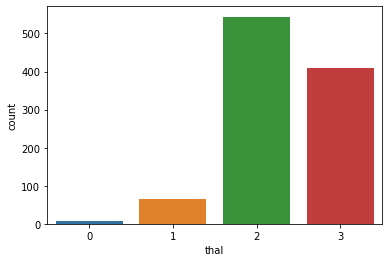

value count of feature target in dataset is : 
1    526
0    499
Name: target, dtype: int64
****
*****


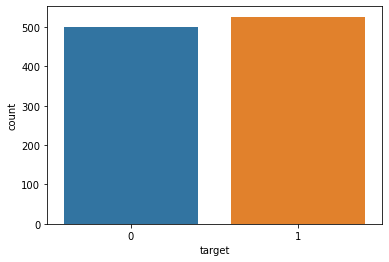

In [19]:
def unianlysis(df):
    import seaborn as sns
    for i in df.columns:
        print(f"value count of feature {i} in dataset is : ")
        print(df[i].value_counts())
        print(f"****\n*****")
        sns.countplot(df[i])
        plt.show()  
        
unianlysis(data)

hist plot of feature age in dataset is : 
58    68
57    57
54    53
59    46
52    43
51    39
56    39
62    37
60    37
44    36
64    34
41    32
63    32
67    31
61    31
55    30
65    27
43    26
42    26
53    26
66    25
45    25
48    23
46    23
50    21
47    18
49    17
35    15
39    14
70    14
68    12
38    12
71    11
40    11
69     9
37     6
34     6
29     4
76     3
77     3
74     3
Name: age, dtype: int64
****
*****


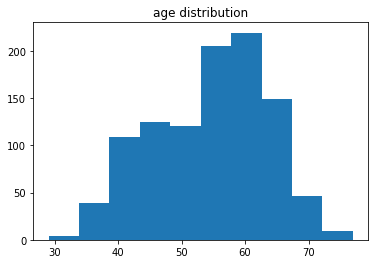

hist plot of feature sex in dataset is : 
1    713
0    312
Name: sex, dtype: int64
****
*****


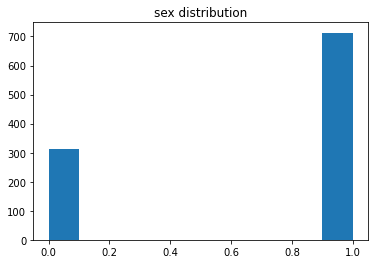

hist plot of feature cp in dataset is : 
0    497
2    284
1    167
3     77
Name: cp, dtype: int64
****
*****


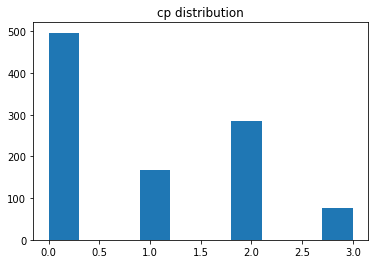

hist plot of feature trestbps in dataset is : 
120    128
130    123
140    107
110     64
150     55
138     45
128     39
125     38
160     36
112     30
132     28
118     24
108     21
124     20
135     20
145     17
134     17
152     17
170     15
122     14
100     14
136     11
126     10
180     10
142      9
115      9
105      9
146      8
148      7
178      7
94       7
144      6
102      6
154      4
117      4
165      4
200      4
114      4
123      4
192      3
106      3
104      3
129      3
174      3
155      3
172      3
164      3
156      3
101      3
Name: trestbps, dtype: int64
****
*****


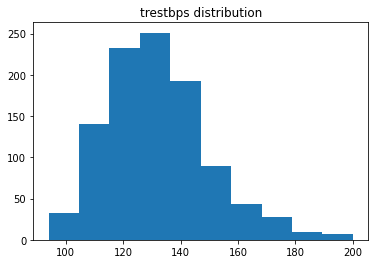

hist plot of feature chol in dataset is : 
204    21
234    21
197    19
212    18
254    17
       ..
164     3
394     3
215     3
160     3
141     3
Name: chol, Length: 152, dtype: int64
****
*****


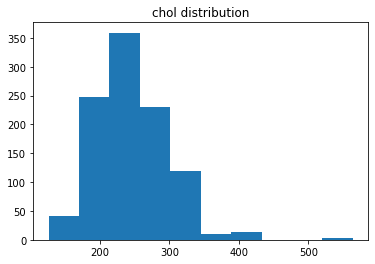

hist plot of feature fbs in dataset is : 
0    872
1    153
Name: fbs, dtype: int64
****
*****


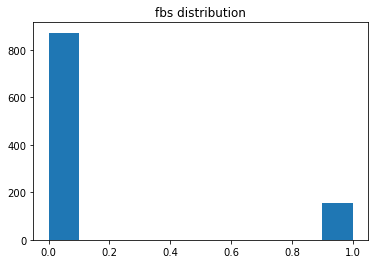

hist plot of feature restecg in dataset is : 
1    513
0    497
2     15
Name: restecg, dtype: int64
****
*****


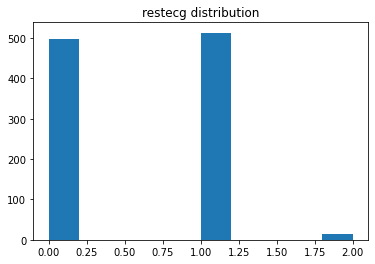

hist plot of feature thalach in dataset is : 
162    35
160    31
163    29
173    28
152    28
       ..
194     3
185     3
106     3
88      3
113     3
Name: thalach, Length: 91, dtype: int64
****
*****


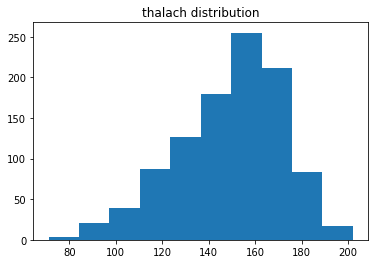

hist plot of feature exang in dataset is : 
0    680
1    345
Name: exang, dtype: int64
****
*****


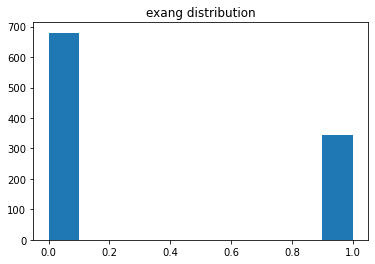

hist plot of feature oldpeak in dataset is : 
0.0    329
1.2     58
1.0     51
0.6     47
0.8     44
1.4     44
1.6     37
0.2     37
1.8     36
2.0     32
0.4     30
0.1     23
2.8     22
2.6     21
3.0     17
1.9     16
1.5     16
3.6     15
0.5     15
2.2     14
4.0     12
2.4     11
0.3     10
3.4     10
0.9     10
3.2      8
2.5      7
2.3      7
4.2      6
1.1      6
4.4      4
3.8      4
5.6      4
3.1      4
1.3      3
2.9      3
2.1      3
6.2      3
0.7      3
3.5      3
Name: oldpeak, dtype: int64
****
*****


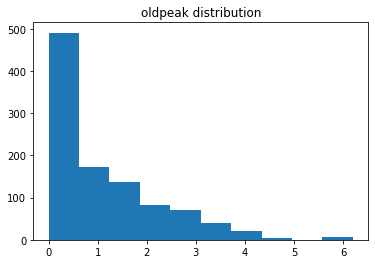

hist plot of feature slope in dataset is : 
1    482
2    469
0     74
Name: slope, dtype: int64
****
*****


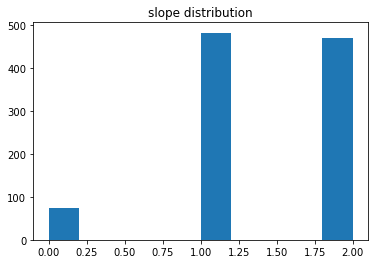

hist plot of feature ca in dataset is : 
0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64
****
*****


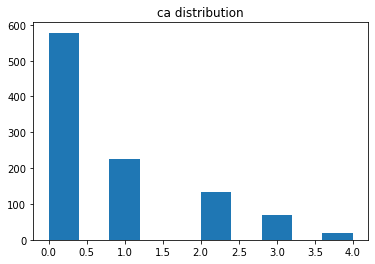

hist plot of feature thal in dataset is : 
2    544
3    410
1     64
0      7
Name: thal, dtype: int64
****
*****


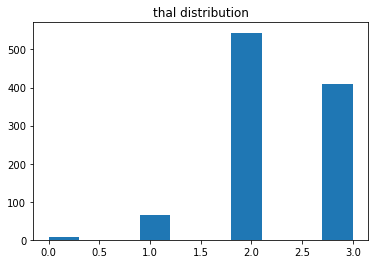

hist plot of feature target in dataset is : 
1    526
0    499
Name: target, dtype: int64
****
*****


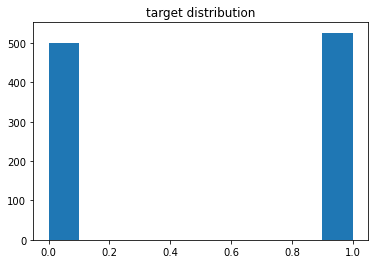

In [20]:
def unianlysis2(df):
    for i in df.columns:
        print(f"hist plot of feature {i} in dataset is : ")
        print(df[i].value_counts())
        print(f"****\n*****")
        
        import matplotlib.pyplot as plt
        plt.hist(x=i,data=df)
        plt.title(f"{i} distribution")
        plt.show()
        
unianlysis2(data)

### 3.12 Bivariate analysis

In [21]:
def bivanlys1(df,target_feat):
    for i in df.columns:
        print(f"crosstab of feature {i} w.r.t. {target_feat}in dataset is : ")
        ct=pd.crosstab(df[i],df[target_feat]) 
        ct=cd=pd.DataFrame(ct)
        print(f"****\n*****")
        print(ct)
        
def bivanlys2(df,target_feat):
    import seaborn as sns
    for i in df.columns:
        print(f"boxplot of feature {i} w.r.t. {target_feat} in dataset is : ")
        sns.heatmap(y=df[target_feat],x=df[i])
        plt.show()
        print(f"****\n*****")
# bivanlys2(data,'target')

boxplot of feature age w.r.t. target in dataset is : 


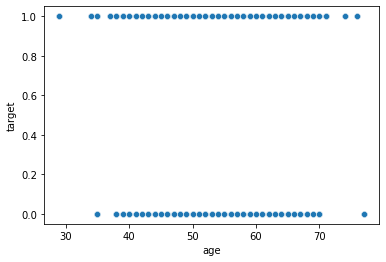

****
*****
boxplot of feature sex w.r.t. target in dataset is : 


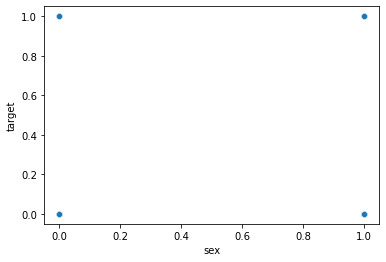

****
*****
boxplot of feature cp w.r.t. target in dataset is : 


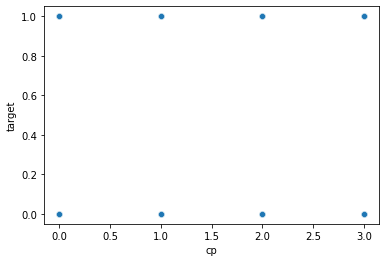

****
*****
boxplot of feature trestbps w.r.t. target in dataset is : 


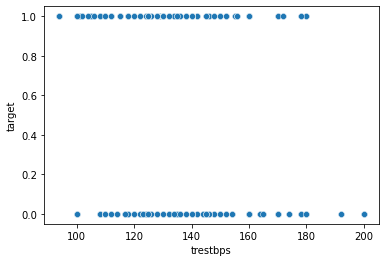

****
*****
boxplot of feature chol w.r.t. target in dataset is : 


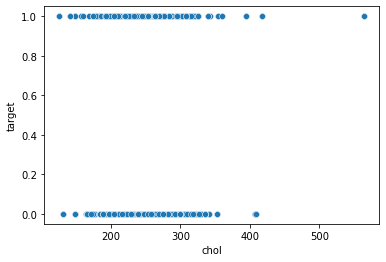

****
*****
boxplot of feature fbs w.r.t. target in dataset is : 


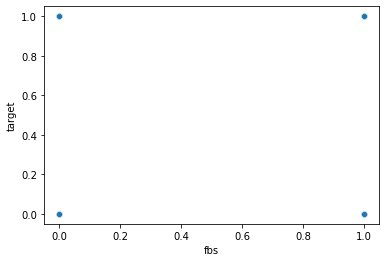

****
*****
boxplot of feature restecg w.r.t. target in dataset is : 


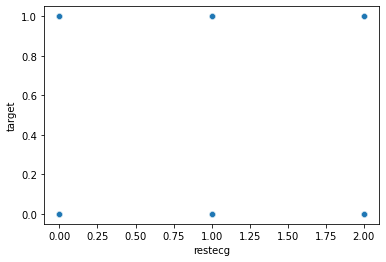

****
*****
boxplot of feature thalach w.r.t. target in dataset is : 


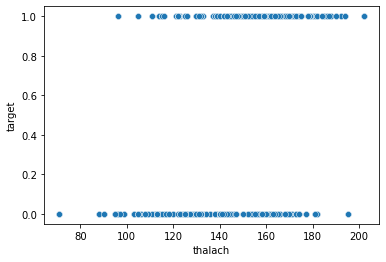

****
*****
boxplot of feature exang w.r.t. target in dataset is : 


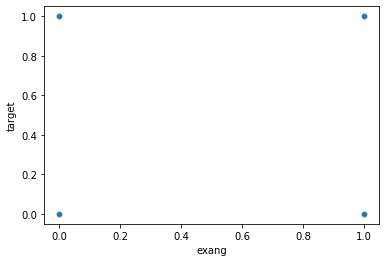

****
*****
boxplot of feature oldpeak w.r.t. target in dataset is : 


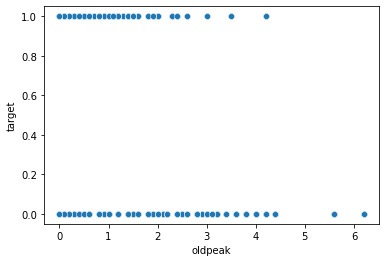

****
*****
boxplot of feature slope w.r.t. target in dataset is : 


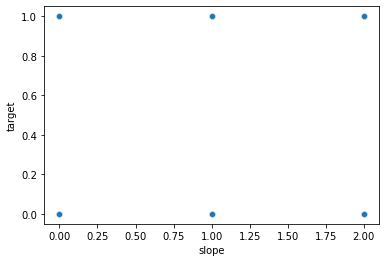

****
*****
boxplot of feature ca w.r.t. target in dataset is : 


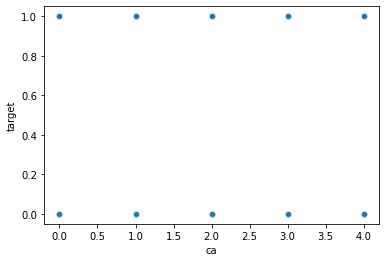

****
*****
boxplot of feature thal w.r.t. target in dataset is : 


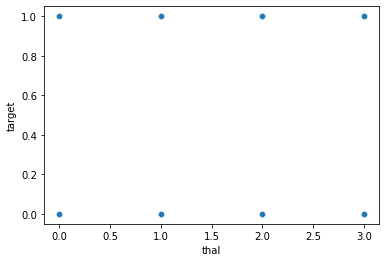

****
*****
boxplot of feature target w.r.t. target in dataset is : 


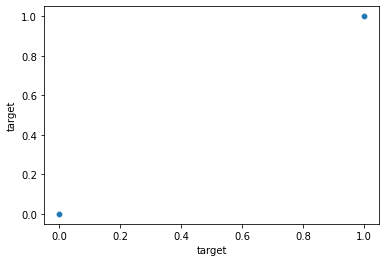

****
*****


In [22]:
def bivanlys2(df,target_feat):
    import seaborn as sns
    for i in df.columns:
        print(f"boxplot of feature {i} w.r.t. {target_feat} in dataset is : ")
        sns.scatterplot(y=df[target_feat],x=df[i])
        plt.show()
        print(f"****\n*****")
bivanlys2(data,'target')    

# Step 4: Feature Engineering

### 4.1 check numerical feature and categorical features

In [23]:
type_frame=pd.DataFrame(data=data.dtypes,columns=['Type'])
type_frame.transpose()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
Type,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64


In [24]:
cat_val=[]
cont_val=[]

for column in data.columns:
    if data[column].nunique()<=10:
        cat_val.append(column)
    else:
        cont_val.append(column)
        
cat_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [25]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

### 4.2 convert categorical column to numerical columns

In [26]:
cat_val.remove('sex')
cat_val.remove('target')
data= pd.get_dummies(data,columns=cat_val,drop_first=True)
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


### 4.8 Feature Scaling (Standardization, Normalization)

In [27]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
data[cont_val]=st.fit_transform(data[cont_val])
data.head(5)

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.268437,1,-0.377636,-0.659332,0.821321,-0.060888,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.158157,1,0.479107,-0.833861,0.255968,1.727137,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.716595,1,0.764688,-1.396233,-1.048692,1.301417,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.724079,1,0.936037,-0.833861,0.516900,-0.912329,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.834359,0,0.364875,0.930822,-1.874977,0.705408,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


## Step 6: Model Training

### 6.1 Splitting the data

In [28]:
x=data.drop('target',axis=1)
y=data['target']

### 6.2 Train/Test split

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### 6.3 Import the model

In [30]:
#classification
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

from sklearn import svm
svm=svm.SVC()

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()


### 6.4 Model training

In [31]:
lr.fit(x_train,y_train)
svm.fit(x_train,y_train)
knn.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

## Step 7: Model Evaluation 

### 7.1 Predict on test data

In [32]:
y_pred_lr=lr.predict(x_test)
y_pred_svm=svm.predict(x_test)
y_pred_knn=knn.predict(x_test)
y_pred_dt=dt.predict(x_test)
y_pred_rf=rf.predict(x_test)
y_pred_gbc=gbc.predict(x_test)

### 7.2 Evaluate the model accuarcy

In [33]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [34]:
final_data=pd.DataFrame({'models':['LR','SVM','KNN','RF','GBC'],
                        'ACC':[accuracy_score(y_test,y_pred_lr),accuracy_score(y_test,y_pred_svm),
                               accuracy_score(y_test,y_pred_knn),accuracy_score(y_test,y_pred_rf),accuracy_score(y_test,y_pred_gbc)]})
final_data

,models,ACC
0,LR,0.819512
1,SVM,0.873171
2,KNN,0.790244
3,RF,1.000000
4,GBC,0.980488


In [35]:
precision_data=pd.DataFrame({'models':['LR','SVM','KNN','RF','GBC'],
                        'ACC':[precision_score(y_test,y_pred_lr),
                               precision_score(y_test,y_pred_svm),
                               precision_score(y_test,y_pred_knn),
                               precision_score(y_test,y_pred_rf),
                               precision_score(y_test,y_pred_gbc)]})

<AxesSubplot:xlabel='models', ylabel='ACC'>

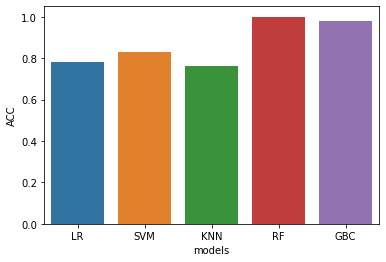

In [36]:
precision_data=pd.DataFrame({'models':['LR','SVM','KNN','RF','GBC'],
                        'ACC':[precision_score(y_test,y_pred_lr),
                               precision_score(y_test,y_pred_svm),
                               precision_score(y_test,y_pred_knn),
                               precision_score(y_test,y_pred_rf),
                               precision_score(y_test,y_pred_gbc)]})

sns.barplot(precision_data['models'],precision_data['ACC'])

<AxesSubplot:xlabel='models', ylabel='ACC'>

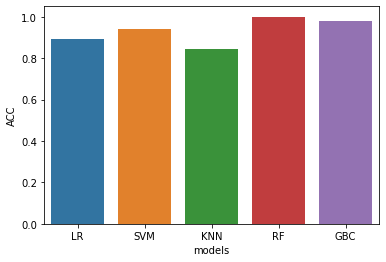

In [37]:
recall_data=pd.DataFrame({'models':['LR','SVM','KNN','RF','GBC'],
                        'ACC':[recall_score(y_test,y_pred_lr),
                               recall_score(y_test,y_pred_svm),
                               recall_score(y_test,y_pred_knn),
                               recall_score(y_test,y_pred_rf),
                               recall_score(y_test,y_pred_gbc)]})

sns.barplot(recall_data['models'],recall_data['ACC'])

<AxesSubplot:xlabel='models', ylabel='ACC'>

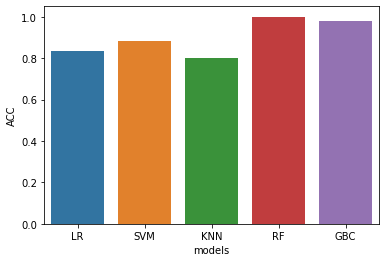

In [38]:
f1_data=pd.DataFrame({'models':['LR','SVM','KNN','RF','GBC'],
                        'ACC':[f1_score(y_test,y_pred_lr),
                               f1_score(y_test,y_pred_svm),
                              f1_score(y_test,y_pred_knn),
                               f1_score(y_test,y_pred_rf),
                               f1_score(y_test,y_pred_gbc)]})

sns.barplot(f1_data['models'],f1_data['ACC'])

In [39]:
final_data

,models,ACC
0,LR,0.819512
1,SVM,0.873171
2,KNN,0.790244
3,RF,1.000000
4,GBC,0.980488


### 7.5 Final Model selection

In [56]:
rf=RandomForestClassifier()

### 7.6 Train model on complete dataset

In [57]:
rf.fit(x,y)

RandomForestClassifier()

In [58]:
data.columns

Index(['age', 'sex', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target',
       'cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1',
       'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [59]:
data_copy.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [60]:
a=data_copy.drop('target',axis=1)
b=data_copy['target']

In [61]:
rf.fit(x,y)

RandomForestClassifier()

In [64]:
x.columns

Index(['age', 'sex', 'trestbps', 'chol', 'thalach', 'oldpeak', 'cp_1', 'cp_2',
       'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1', 'slope_1',
       'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1', 'thal_2',
       'thal_3'],
      dtype='object')

### 7.7 Create user test function 

In [62]:
a.head(1).columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [74]:
a=input("enter value for 'age' : ")
b=input("enter value for sex : ")
c=input("enter value for trestbps : ")
d=input("enter value for chol : ")
e=input("enter value for thalach : ")
f=input("enter value for  oldpeak: ")
g=input("enter value for  cp_1: ")
h=input("enter value for  cp_2: ")
i=input("enter value for  cp_3: ")


j=input("enter value for  fbs_1: ")
k=input("enter value for  restecg_1: ")
l=input("enter value for  restecg_2: ")

m=input("enter value for  exang_1: ")
n=input("enter value for slope_1: ")
o=input("enter value for slope_2: ")

p=input("enter value for  ca_1: ")
q=input("enter value for  ca_2: ")
r=input("enter value for  ca_3: ")
s=input("enter value for  ca_4: ")

t=input("enter value for  thal_1: ")
u=input("enter value for  thal_2: ")
v=input("enter value for  thal_3: ")



new_data=pd.DataFrame({'age': a,
                       'sex':b, 
                       'trestbps':c, 'chol':d, 'thalach':e, 'oldpeak':f, 
'cp_1':g, 'cp_2':h,
       'cp_3':i, 
    'fbs_1':j, 
    'restecg_1':k, 'restecg_2':l,
    'exang_1':m, 
       'slope_1':n,
       'slope_2':o, 
        'ca_1':p, 'ca_2':q, 'ca_3':r, 'ca_4':s, 
        'thal_1':t, 'thal_2':u,
       'thal_3':v                                          
},index=[0])
p=rf.predict(new_data)

print("your report is here : you are ")

if p[0]==0:
    print("not a heart disease")
else:

    print("heart disease")

enter value for 'age' : -0.268
enter value for sex : 1
enter value for trestbps : -0.377636
enter value for chol : -0.659332
enter value for thalach : 0.821321
enter value for  oldpeak: -0.06088
enter value for  cp_1: 0
enter value for  cp_2: 0
enter value for  cp_3: 0
enter value for  fbs_1: 0
enter value for  restecg_1: 1
enter value for  restecg_2: 0
enter value for  exang_1: 0
enter value for slope_1: 0
enter value for slope_2: 1
enter value for  ca_1: 0
enter value for  ca_2: 1
enter value for  ca_3: 0
enter value for  ca_4: 0
enter value for  thal_1: 0
enter value for  thal_2: 0
enter value for  thal_3: 1
your report is here : you are 
not a heart disease


In [72]:
m=x.head(1)
m

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.268437,1,-0.377636,-0.659332,0.821321,-0.060888,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [69]:
result=rf.predict(m)
result


array([0], dtype=int64)

### 7.8 Save the model

#### Saving final algorithm

In [75]:
rf=RandomForestClassifier()
rf.fit(x,y)

RandomForestClassifier()

#### Creating pickle file

In [79]:
import pickle
# open a file, where you ant to store the data
file = open('heart_disease_pred_rf_p.pkl', 'wb')

# dump information to that file
pickle.dump(rf, file)

#### Loading pickle file

In [80]:
model = pickle.load(open('heart_disease_pred_rf_p.pkl', 'rb'))

EOFError: Ran out of input

In [ ]:
r=x.head(1)
print(f"data for testing {r}")
print(f"result of testing data {y.head(1)}")
result=model.predict(r)
print(f"result of prediction is {result}")

## Step 8: API Creation

### 1. Creating GUI 

In [ ]:
from tkinter import *
import joblib

def show_entry():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    p7=float(e7.get())
    p8=float(e8.get())
    p9=float(e9.get())
    p10=float(e10.get())
    p11=float(e11.get())
    p12=float(e12.get())
    p13=float(e13.get())
    
    
    model = pickle.load(open('heart_disease_pred_rf_prabhat.pkl', 'rb'))
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13]])
    
    Label(master,text="heart disease pred ").grid(row=15)
    Label(master,text=result).grid(row=16)


master=Tk()
master.title("Heart disease Prediction: ")
label=Label(master,text= "heart disease prediction",bg="black", fg="white").grid(row=0,columnspan=2)     

Label(master,text = "Enter your 'age' ").grid(row=1)
Label(master,text="Enter 'sex'").grid(row=2)
Label(master,text="Enter 'cp'").grid(row=3)
Label(master,text="Enter 'trestbps'" ).grid(row=4)
Label(master,text="Enter 'chols' ").grid(row=5)
Label(master,text="Enter 'fbs' ").grid(row=6)
Label(master,text="Enter 'restecg'").grid(row=7)
Label(master,text="Enter 'thalach' ").grid(row=8)

Label(master,text="Enter 'exang' ").grid(row=9)
Label(master,text="Enter 'oldpeak' ").grid(row=10)
Label(master,text="Enter 'slope'").grid(row=11)
Label(master,text="Enter 'ca' ").grid(row=12)
Label(master,text="Enter 'thal' ").grid(row=13)

e1=Entry(master)
e2=Entry(master)
e3=Entry(master)
e4=Entry(master)
e5=Entry(master)
e6=Entry(master)
e7=Entry(master)
e8=Entry(master)
e9=Entry(master)
e10=Entry(master)
e11=Entry(master)
e12=Entry(master)
e13=Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)
e12.grid(row=12,column=1)
e13.grid(row=13,column=1)




Button(master,text='Predict',command=show_entry).grid()

# mainloop()
master.mainloop()